In [1]:
# Day 90 - Advanced Unsupervised Learning (Anomaly Detection)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

# ---------------- Generate Synthetic Data ----------------
np.random.seed(42)
normal_data = np.random.normal(50, 5, (200, 2))   # Normal points
anomalies = np.random.uniform(30, 80, (10, 2))    # Anomalous points
X = np.vstack([normal_data, anomalies])
df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])

In [2]:
# ---------------- 1️⃣ Statistical Method (Z-Score) ----------------
df['Z_Score_F1'] = (df['Feature1'] - df['Feature1'].mean()) / df['Feature1'].std()
df['Z_Score_F2'] = (df['Feature2'] - df['Feature2'].mean()) / df['Feature2'].std()
df['Stat_Anomaly'] = ((np.abs(df['Z_Score_F1']) > 3) | (np.abs(df['Z_Score_F2']) > 3)).astype(int)

In [4]:
# ---------------- 2️⃣ Isolation Forest ----------------
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df['Iso_Pred'] = iso_forest.fit_predict(df[['Feature1', 'Feature2']])
df['Iso_Anomaly'] = df['Iso_Pred'].apply(lambda x: 1 if x == -1 else 0)

In [5]:
# ---------------- 3️⃣ Local Outlier Factor ----------------
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
df['LOF_Pred'] = lof.fit_predict(df[['Feature1', 'Feature2']])
df['LOF_Anomaly'] = df['LOF_Pred'].apply(lambda x: 1 if x == -1 else 0)

In [6]:
# ---------------- 4️⃣ One-Class SVM ----------------
svm = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.05)
svm.fit(df[['Feature1', 'Feature2']])
df['SVM_Pred'] = svm.predict(df[['Feature1', 'Feature2']])
df['SVM_Anomaly'] = df['SVM_Pred'].apply(lambda x: 1 if x == -1 else 0)

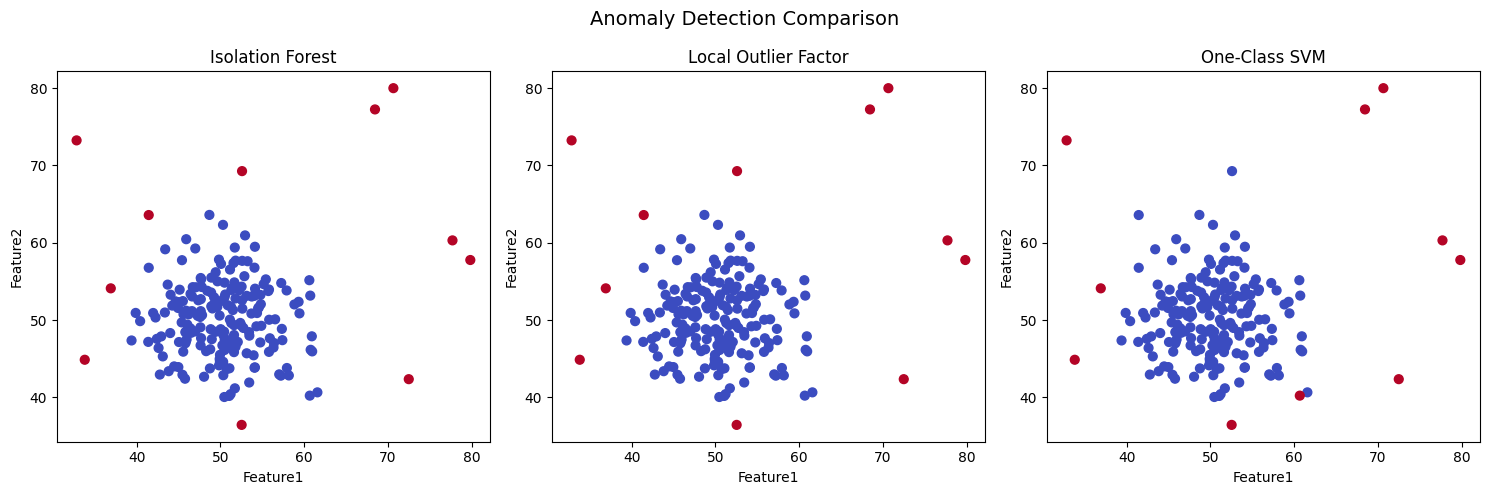

In [7]:
# ---------------- Visualization ----------------
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
methods = ['Iso_Anomaly', 'LOF_Anomaly', 'SVM_Anomaly']
titles = ['Isolation Forest', 'Local Outlier Factor', 'One-Class SVM']

for ax, method, title in zip(axs, methods, titles):
    ax.scatter(df['Feature1'], df['Feature2'], c=df[method], cmap='coolwarm', s=40)
    ax.set_title(title)
    ax.set_xlabel('Feature1')
    ax.set_ylabel('Feature2')

plt.suptitle("Anomaly Detection Comparison", fontsize=14)
plt.tight_layout()
plt.show()

In [8]:
# ---------------- Summary ----------------
print("\n🔍 Anomaly Detection Summary:")
print(df[['Feature1', 'Feature2', 'Stat_Anomaly', 'Iso_Anomaly', 'LOF_Anomaly', 'SVM_Anomaly']].tail(10))


🔍 Anomaly Detection Summary:
      Feature1   Feature2  Stat_Anomaly  Iso_Anomaly  LOF_Anomaly  SVM_Anomaly
200  50.740975  43.670354             0            0            0            0
201  32.818775  73.236119             1            1            1            1
202  70.645050  79.985884             1            1            1            1
203  79.831842  57.771585             1            1            1            1
204  68.449371  77.238286             1            1            1            1
205  72.482370  42.367405             1            1            1            1
206  52.527207  36.457971             0            1            1            1
207  77.702551  60.308732             1            1            1            1
208  41.432140  63.585034             0            1            1            0
209  60.906412  47.908136             0            0            0            0
